<a href="https://colab.research.google.com/github/IbtIbeth/Markovid/blob/main/MarKovid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Portada

# MARKOVID

*   Ibeth Escobedo Rios
*   Jazmín López Chacón
*   Luis David Huante

![](https://raw.githubusercontent.com/Chalysis/Markovid/main/cadena_probs.png)



In [ ]:
# DDownload dataset
! wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1-KDj7eWXJ63X4lqgm1BJdFEIbF19xdrw' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1-KDj7eWXJ63X4lqgm1BJdFEIbF19xdrw" -O theDataset.csv && rm -rf /tmp/cookies.txt


In [ ]:
#Librerías necesarías
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import collections

Lo primero es cargar los datos que se encuentran en el archivo csv que se descargó anteriormente.

In [ ]:
cols = ['FECHA_ACTUALIZACION', 'ID_REGISTRO',  'TIPO_PACIENTE', 'FECHA_INGRESO', 
        'FECHA_SINTOMAS', 'FECHA_DEF', 'CLASIFICACION_FINAL']

In [ ]:
covidato = pd.read_csv('/content/theDataset.csv', usecols=cols, compression='zip'); covidato

,FECHA_ACTUALIZACION,ID_REGISTRO,TIPO_PACIENTE,FECHA_INGRESO,FECHA_SINTOMAS,FECHA_DEF,CLASIFICACION_FINAL
0,2021-12-12,zz7202,1,2021-01-13,2021-01-13,9999-99-99,7
1,2021-12-12,z405fd,1,2021-01-25,2021-01-17,9999-99-99,7
2,2021-12-12,z26b82,1,2021-01-14,2021-01-10,9999-99-99,7
3,2021-12-12,z23d9d,1,2021-01-05,2021-01-05,9999-99-99,6
4,2021-12-12,zze974,1,2021-02-28,2021-02-20,9999-99-99,7
...,...,...,...,...,...,...,...
7627395,2022-01-19,68f3cd,1,2021-05-28,2021-05-28,9999-99-99,7
7627396,2022-01-19,78dc97,1,2021-05-19,2021-05-15,2021-05-19,3
7627397,2022-01-19,7604dc,1,2021-01-10,2021-01-10,9999-99-99,3
7627398,2022-01-19,61d4a7,1,2021-01-10,2021-01-10,9999-99-99,3


In [ ]:
#Revisamos la estructura
covidato.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7627400 entries, 0 to 7627399
Data columns (total 7 columns):
 #   Column               Dtype 
---  ------               ----- 
 0   FECHA_ACTUALIZACION  object
 1   ID_REGISTRO          object
 2   TIPO_PACIENTE        int64 
 3   FECHA_INGRESO        object
 4   FECHA_SINTOMAS       object
 5   FECHA_DEF            object
 6   CLASIFICACION_FINAL  int64 
dtypes: int64(2), object(5)
memory usage: 407.3+ MB


# Estructura del modelo
Para hacer la cadena, necesitamos primero definir los estados, después de una revisión, los estados son los siguientes:
* Sintomática (S)
* Negativa (N)
* Positiva (P)
* Hospitalizada (H)
* Difunta (D)

Para poder ver bien el comportamiento de estos estados, es necesario hacer las separaciones.

In [ ]:
#Conjuntos
neg = covidato[covidato.CLASIFICACION_FINAL == 7] #Negativa
pos = covidato[covidato.CLASIFICACION_FINAL.isin([1,2,3])] # Positiva
hos = covidato[(covidato.TIPO_PACIENTE == 2)] #Hospitalizada
dif = covidato[covidato.FECHA_DEF != "9999-99-99"] #Difunta

Lo siguiente es considerar las intersecciones entre dos conjuntos.

In [ ]:
### ######## ###
### NEGATIVA ###
### ######## ###
# Las personas que han tenido un resultado negativo y uno positivo
pos_neg = neg[neg.ID_REGISTRO.isin(pos.ID_REGISTRO)]
# Las personas que han estado hospitalizadas y no tienen covid
hos_neg = hos[hos.ID_REGISTRO.isin(neg.ID_REGISTRO)]

In [ ]:
### ######## ###
### POSITIVA ###
### ######## ###
# Las personas que han estado hospitalizadas y tienen covid
hos_pos = hos[hos.ID_REGISTRO.isin(pos.ID_REGISTRO)]
#Personas difuntas que padecieron covid
dif_pos = dif[dif.ID_REGISTRO.isin(pos.ID_REGISTRO)]

In [ ]:
dif[dif.ID_REGISTRO.isin(pos_neg.ID_REGISTRO)].sort_values(by='ID_REGISTRO')

,FECHA_ACTUALIZACION,ID_REGISTRO,TIPO_PACIENTE,FECHA_INGRESO,FECHA_SINTOMAS,FECHA_DEF,CLASIFICACION_FINAL
4808951,2022-01-19,4fcede,2,2021-01-30,2021-01-17,2021-01-30,1
2253688,2021-12-12,8d63b5,2,2021-03-27,2021-03-20,2021-04-05,1
6067388,2022-01-19,8d63b5,2,2021-03-27,2021-03-20,2021-04-05,7
1763304,2021-12-12,adba70,2,2021-02-27,2021-02-18,2021-03-13,7
5577004,2022-01-19,adba70,2,2021-02-27,2021-02-18,2021-03-13,3
3114695,2021-12-12,c0874b,2,2021-05-18,2021-05-18,2021-05-18,2
6928395,2022-01-19,c0874b,2,2021-05-18,2021-05-18,2021-05-18,7
584765,2021-12-12,c1488c,2,2021-01-18,2021-01-15,2021-01-24,7
4398465,2022-01-19,c1488c,2,2021-01-18,2021-01-15,2021-01-24,3
637418,2021-12-12,cd2a49,2,2021-01-21,2021-01-19,2021-01-25,2


In [ ]:
dif[dif.ID_REGISTRO=='adba70'][['ID_REGISTRO','FECHA_ACTUALIZACION','FECHA_INGRESO','FECHA_SINTOMAS','FECHA_DEF','CLASIFICACION_FINAL']]

,ID_REGISTRO,FECHA_ACTUALIZACION,FECHA_INGRESO,FECHA_SINTOMAS,FECHA_DEF,CLASIFICACION_FINAL
1763304,adba70,2021-12-12,2021-02-27,2021-02-18,2021-03-13,7
5577004,adba70,2022-01-19,2021-02-27,2021-02-18,2021-03-13,3


In [ ]:
dif.FECHA_DEF.max() 

'2021-11-27'

In [ ]:
rec = pos[(pos.FECHA_INGRESO < '2021-11-13')&(~pos.ID_REGISTRO.isin(dif.ID_REGISTRO))]['ID_REGISTRO']
inf_gnr = {'pT': covidato.ID_REGISTRO.nunique(), 'casos': pos.ID_REGISTRO.nunique(), 
           'muertes': dif_pos.ID_REGISTRO.nunique(), 'hospitalizados': hos_pos.ID_REGISTRO.nunique(),
           'No hospitalizados': pos.ID_REGISTRO.nunique() - hos_pos.ID_REGISTRO.nunique(), 
           'recuperados': rec.nunique()
}

In [ ]:
inf_gnr

{'No hospitalizados': 862400,
 'casos': 1020359,
 'hospitalizados': 157959,
 'muertes': 82461,
 'pT': 3813700,
 'recuperados': 937898}

In [ ]:
dif.TIPO_PACIENTE.value_counts()

2    199016
1     13213
Name: TIPO_PACIENTE, dtype: int64

In [ ]:
######################
### PROBABILIDADES ###
######################

### Estando en S###

#S->N
P_S2N = neg.ID_REGISTRO.nunique()/inf_gnr['pT'] #P(N&S)/P(S)


#S->P
P_S2P = pos.ID_REGISTRO.nunique()/inf_gnr['pT'] #P(P&S)/P(S)

print(f"S->N={P_S2N:.4f}, S->P{P_S2P:.4f}")

S->N=0.7061, S->P0.2676


In [ ]:
### Estando en P ###

#P-> N
P_P2N = pos[(pos.ID_REGISTRO.isin(rec))&(~pos.ID_REGISTRO.isin(hos.ID_REGISTRO))].ID_REGISTRO.nunique()/pos.ID_REGISTRO.nunique()

#P -> H
P_P2H = hos_pos.ID_REGISTRO.nunique()/pos.ID_REGISTRO.nunique(); P_P2H

#P -> D
P_P2M = pos[(pos.ID_REGISTRO.isin(dif.ID_REGISTRO))&(~pos.ID_REGISTRO.isin(hos.ID_REGISTRO))].ID_REGISTRO.nunique()/pos.ID_REGISTRO.nunique()

print(f"P->N={P_P2N:.4f},P->H={P_P2H:.4f},P->M={P_P2M:.4f}")

P->N=0.8402,P->H=0.1548,P->M=0.0050


In [ ]:
### Estando en H ###

P_H2N = hos_pos[(hos_pos.ID_REGISTRO.isin(rec))].ID_REGISTRO.nunique()/hos_pos.ID_REGISTRO.nunique()

P_H2M = hos_pos[(hos_pos.ID_REGISTRO.isin(dif.ID_REGISTRO))].ID_REGISTRO.nunique()/hos_pos.ID_REGISTRO.nunique()

print(f"H->N={P_H2N:.4f},H->M={P_H2M:.4f}")

H->N=0.5101,H->M=0.4899


In [ ]:
#Probabilidades PASARLO A MARKDOWN ANTES DE EMPEZAR LOS CÁLCULOS
"""2 -> P_+2 H = #Hos_pos/ #pos
11 -> P_+2 M = #(~Hosp ^ Dif_pos)/#pos
7 -> P_+2- = #(Rec-Hos_pos)/#pos
8 -> P_H2- = #Hos_pos ^ rec / #hos_pos
9 -> P_H2 M = #hos_pos ^ #dif_pos"""

'2 -> P_+2 H = #Hos_pos/ #pos\n11 -> P_+2 M = #(~Hosp ^ Dif_pos)/#pos\n7 -> P_+2- = #(Rec-Hos_pos)/#pos\n8 -> P_H2- = #Hos_pos ^ rec / #hos_pos\n9 -> P_H2 M = #hos_pos ^ #dif_pos'

In [ ]:
#Definición del diccionario

chain = {'S':[('P',0.2676), ('N',0.7061)], 
           'P':[('N',0.8402), ('H',0.1548), ('D',0.0050)], 
           'H':[('N',0.5101), ('D',0.4899)],
           'D':[('D',1)]} #Es estado final


In [ ]:
personas = ['S' for i in range(100)] # personas a pruebas

In [ ]:
chain

{'D': [('D', 1)],
 'H': [('N', 0.5101), ('D', 0.4899)],
 'P': [('N', 0.8402), ('H', 0.1548), ('D', 0.005)],
 'S': [('P', 0.2676), ('N', 0.7061)]}

In [ ]:
for i in range(100):
  x = np.random.random()
  if x <= 0.7061:
    personas[i] = 'N'
  else:
    personas[i] = 'P'

In [ ]:
personas.count('P')

34

In [ ]:
personas = ['S' for i in range(int(1e5))]

In [ ]:
for i in range(len(personas)):
  estado = personas[i]
  if estado =='N':
    continue
  x = np.random.random()
  trans = chain[estado]
  trans.sort(key = lambda x: x[1])
  probs = [t[1] for t in trans]
  if x <= probs[0]:
    personas[i] = trans[0][0]
  else:
    for j in range(1,len(probs)):
      lim_inf = probs[j-1]
      lim_sup = probs[j]+lim_inf
      
      if x > lim_inf and x <= lim_sup:
        personas[i] = trans[j][0]
        break

  #print(trans)

In [ ]:
personas.count('N')

70463

In [ ]:
contador = dict(collections.Counter(personas)); contador

{'N': 70463, 'P': 26905, 'S': 2632}

In [ ]:
contador = dict(collections.Counter(personas)); contador

{'N': 70463, 'P': 26905, 'S': 2632}

In [ ]:
contador = dict(collections.Counter(personas)); contador

{'N': 70463, 'P': 26905, 'S': 2632}

In [ ]:
contador = dict(collections.Counter(personas)); contador

{'N': 70463, 'P': 26905, 'S': 2632}

## Empezando las simulaciones

Hacemos una función que nos permita obtener el siguiente estado de una población.

In [ ]:
def get_states(people):
    #people: List of strings that represents thecurrent state of a population
    """
    This function will see the current state for each person and will update it,
    at the end the function will count the people in each state and will return
    a dictionary with the counter
    """

    n = len(people)

    for i in range(n):
        state = people[i]
        
        #If the person doesn't have covid, we can't predict their next state
        if state =='N':
            continue

        #We generate a random number in the interval [0,1)
        x = np.random.random()

        #We get the transitions and sort them ascending order(?) by the probaility
        transitions = chain[state]
        transitions.sort(key = lambda x: x[1])

        #We get the probabilities
        probs = [t[1] for t in transitions]

        #We get the next state of our person by checking the interval where the
        #random number fell (?) 
        for j in range(len(probs)):
            if j==0:
                if x <= probs[j]:
                    people[i] = transitions[j][0]
                    break
                continue

            lim_inf = probs[j-1]
            lim_sup = probs[j]+lim_inf
                
            if x > lim_inf and x <= lim_sup:
                people[i] = transitions[j][0]
                break

    #We return the dictionary that counts the results
    counter = dict(collections.Counter(people))
    #Our mistake will be the people that didn't get a diagnosis
    try:
        counter['e']= counter['S']
    except:
        counter['e']=0
    #Our S value will be the quantity of people that did a test
    counter['S']=n

    return counter

In [ ]:
#Test
pe = ['S' for i in range(1000)]
get_states(pe)

{'N': 714, 'P': 266, 'S': 1000, 'e': 20}

Hacemos una función que nos permita quedarnos únicamente con aquellas personas que no estén en un estado final.

In [ ]:
def generate_people(people_prev):
    #people_prev: list of strings that represents the current state of each person
    """
    This functions gets an array of people that will take a test to check their
    result
    """


    #We calculate how many people we should add each day
    n = len(people_prev)

    #We only keep those who are not on a final state
    people = [p for p in people_prev if(p!='N' and p!='D')] #Cambiar esto


    #We return the people
    return people + ['S']*n

Creamos una función para manejar las simulaciones.



In [ ]:
def do_simulations(s_people,initial_people=[]):
    #s_people: list with integers of people per day
    #initial_people: list with strings that represent the current state of all people
    """
    This function does n simulations with p people added in each one, the result
    is a dataframe with the main details
    """

    
    if initial_people==[]:
        prev_people=['S']*s_people[0]

    # We create a dataframe that will help us to keep a track
    simulations = pd.DataFrame(columns=['S','N','P','H','D','e'])

    #The first simulation
    simulations.loc[1] = get_states(prev_people)
    simulations.fillna(0,inplace=True)
    #Now we start the simulations
    for i,p in enumerate(s_people[1:]):
        
        #We create our people to check
        positive = int(simulations.loc[i+1,'P'])
        hospitalized = int(simulations.loc[i+1,'H'])
        people = ['S']*p + ['P']*positive + ['H']*hospitalized
        
        #We store the results
        simulations.loc[i+2] = get_states(people)
        simulations.fillna(0,inplace=True)

    #We return the dataframe
    return simulations

In [ ]:
s_people = list(covidato['FECHA_SINTOMAS'].value_counts())
test1 = do_simulations(s_people)

In [ ]:
test1

,S,N,P,H,D,e
1,98643,69559.0,26436.0,0.0,0.0,2648
2,120299,88419.0,25157.0,4092.0,122.0,2509
3,119175,86696.0,24062.0,3857.0,2155.0,2405
4,117489,85193.0,24191.0,3771.0,2023.0,2311
5,117188,85194.0,23933.0,3715.0,1975.0,2371
...,...,...,...,...,...,...
229,3,1.0,2.0,0.0,0.0,0
230,4,4.0,0.0,0.0,0.0,0
231,2,1.0,1.0,0.0,0.0,0
232,3,3.0,0.0,0.0,0.0,0


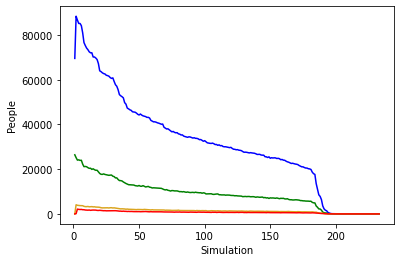

In [ ]:
sims=list(range(1,test1.shape[0]+1))
sns.lineplot(data=test1, x=sims, y="N", color='blue')
sns.lineplot(data=test1, x=sims, y="P", color='green')
sns.lineplot(data=test1, x=sims, y="H", color='goldenrod')
sns.lineplot(data=test1, x=sims, y="D", color='red')
plt.xlabel('Simulation')
plt.ylabel('People')
plt.show()

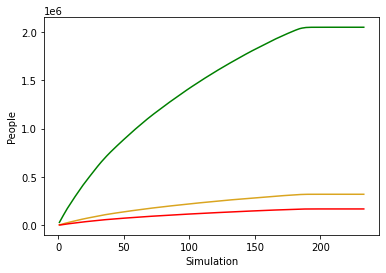

In [ ]:
sims=list(range(1,test1.shape[0]+1))
sns.lineplot(x=sims, y=test1.P.cumsum(), color='green')
sns.lineplot(x=sims, y=test1.H.cumsum(), color='goldenrod')
sns.lineplot(x=sims, y=test1.D.cumsum(), color='red')
plt.xlabel('Simulation')
plt.ylabel('People')
plt.show()

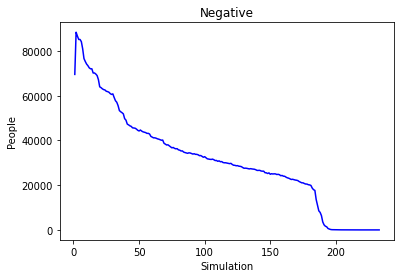

In [ ]:
sims=list(range(1,test1.shape[0]+1))
sns.lineplot(data=test1, x=sims, y="N", color='blue')
plt.title('Negative')
plt.xlabel('Simulation')
plt.ylabel('People')
plt.show()

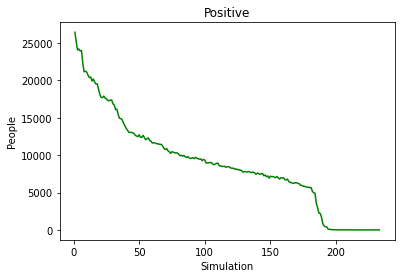

In [ ]:
sims=list(range(1,test1.shape[0]+1))
sns.lineplot(data=test1, x=sims, y="P", color='green')
plt.title('Positive')
plt.xlabel('Simulation')
plt.ylabel('People')
plt.show()

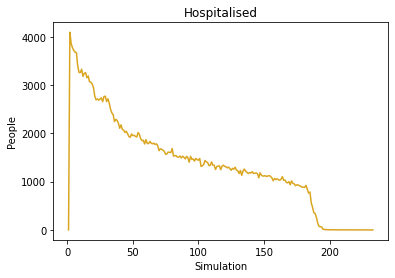

In [ ]:
sims=list(range(1,test1.shape[0]+1))
sns.lineplot(data=test1, x=sims, y="H", color='goldenrod')
plt.title('Hospitalised')
plt.xlabel('Simulation')
plt.ylabel('People')
plt.show()

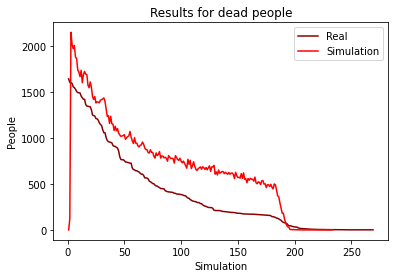

In [ ]:
sims=list(range(1,test1.shape[0]+1))
D=list(dif[dif.FECHA_ACTUALIZACION=='2022-01-19'].FECHA_DEF.value_counts())
nd = [i for i in range(1,len(D)+1)]
sns.lineplot(x=nd, y=D, color='darkred', label='Real')
sns.lineplot(data=test1, x=sims, y="D", color='red', label = 'Simulation')
plt.legend()
plt.title("Results for dead people")
plt.xlabel('Simulation')
plt.ylabel('People')
plt.show()

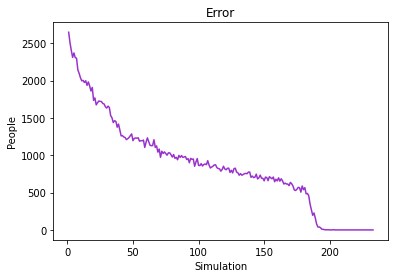

In [ ]:
sims=list(range(1,test1.shape[0]+1))
sns.lineplot(data=test1, x=sims, y="e", color='darkorchid')
plt.title('Error')
plt.xlabel('Simulation')
plt.ylabel('People')
plt.show()